In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Remove all empty files
folder_path = '.'
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 5: # Less than 5 bytes
        os.remove(file_path)
        print(f'Deleted: {file_path}')

In [3]:
station_files = sorted(glob.glob('*.csv'))
station_files.remove('netatmo_stations.csv')
try:
    station_files.remove('temperatures.csv')
except:
    pass
try:
    station_files.remove('diff.csv')
except:
    pass
station_files

['70:ee:50:00:36:40.csv',
 '70:ee:50:00:c9:6e.csv',
 '70:ee:50:00:ea:00.csv',
 '70:ee:50:01:33:6a.csv',
 '70:ee:50:02:e6:38.csv',
 '70:ee:50:03:d3:54.csv',
 '70:ee:50:03:d3:d8.csv',
 '70:ee:50:04:f0:c2.csv',
 '70:ee:50:05:53:70.csv',
 '70:ee:50:05:ea:a6.csv',
 '70:ee:50:12:4a:2c.csv',
 '70:ee:50:12:69:86.csv',
 '70:ee:50:12:7e:fc.csv',
 '70:ee:50:12:ce:a6.csv',
 '70:ee:50:13:68:8e.csv',
 '70:ee:50:17:64:42.csv',
 '70:ee:50:17:e6:4e.csv',
 '70:ee:50:19:dd:76.csv',
 '70:ee:50:1b:0f:34.csv',
 '70:ee:50:1e:05:66.csv',
 '70:ee:50:22:b4:1c.csv',
 '70:ee:50:28:ed:dc.csv',
 '70:ee:50:2b:15:26.csv',
 '70:ee:50:2b:5b:da.csv',
 '70:ee:50:2c:73:12.csv',
 '70:ee:50:2e:d0:4c.csv',
 '70:ee:50:2e:ec:20.csv',
 '70:ee:50:32:fe:fe.csv',
 '70:ee:50:36:d7:16.csv',
 '70:ee:50:37:22:1c.csv',
 '70:ee:50:3a:22:2c.csv',
 '70:ee:50:3f:22:b0.csv',
 '70:ee:50:53:1f:b0.csv',
 '70:ee:50:58:ac:20.csv',
 '70:ee:50:5e:f5:44.csv',
 '70:ee:50:5e:fd:d8.csv',
 '70:ee:50:5f:29:bc.csv',
 '70:ee:50:65:19:62.csv',
 '70:ee:50:6

In [4]:
#for csv_file in station_files:
df = pd.read_csv(station_files[0], delimiter=',')
df.head()

,date,time,temp
0,2023-11-30,22:03:41,7.2
1,2023-11-30,22:19:04,7.2
2,2023-11-30,22:28:29,7.1
3,2023-11-30,22:38:43,7.1
4,2023-11-30,22:54:06,7.0


In [5]:
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df.head(10)

,date,time,temp
0,2023-11-30,2023-11-30 22:03:41,7.2
1,2023-11-30,2023-11-30 22:19:04,7.2
2,2023-11-30,2023-11-30 22:28:29,7.1
3,2023-11-30,2023-11-30 22:38:43,7.1
4,2023-11-30,2023-11-30 22:54:06,7.0
5,2023-11-30,2023-11-30 23:09:28,6.9
6,2023-11-30,2023-11-30 23:24:01,6.8
7,2023-11-30,2023-11-30 23:34:16,6.8
8,2023-11-30,2023-11-30 23:44:31,6.8
9,2023-11-30,2023-11-30 23:54:46,6.7


In [6]:
df['hour'] = df['time'].dt.hour
df.head(10)

,date,time,temp,hour
0,2023-11-30,2023-11-30 22:03:41,7.2,22
1,2023-11-30,2023-11-30 22:19:04,7.2,22
2,2023-11-30,2023-11-30 22:28:29,7.1,22
3,2023-11-30,2023-11-30 22:38:43,7.1,22
4,2023-11-30,2023-11-30 22:54:06,7.0,22
5,2023-11-30,2023-11-30 23:09:28,6.9,23
6,2023-11-30,2023-11-30 23:24:01,6.8,23
7,2023-11-30,2023-11-30 23:34:16,6.8,23
8,2023-11-30,2023-11-30 23:44:31,6.8,23
9,2023-11-30,2023-11-30 23:54:46,6.7,23


In [7]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

# Apply the function to each row in the dataframe
closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

# Convert the result back into a dataframe
result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]
result.head(10)

/tmp/ipykernel_220702/710818299.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


,date,time,temp
0,2023-11-30,2023-11-30 22:03:41,7.2
1,2023-11-30,2023-11-30 23:09:28,6.9
2,2023-12-01,2023-12-01 00:10:08,6.7
3,2023-12-01,2023-12-01 01:00:33,6.7
4,2023-12-01,2023-12-01 02:10:37,6.4
5,2023-12-01,2023-12-01 03:01:01,6.2
6,2023-12-01,2023-12-01 04:06:48,5.5
7,2023-12-01,2023-12-01 05:07:28,5.7
8,2023-12-01,2023-12-01 06:08:07,6.0
9,2023-12-01,2023-12-01 07:08:47,6.0


In [8]:
result['time'] = result['time'].dt.hour
result.head()

,date,time,temp
0,2023-11-30,22,7.2
1,2023-11-30,23,6.9
2,2023-12-01,0,6.7
3,2023-12-01,1,6.7
4,2023-12-01,2,6.4


In [9]:
# Filter by date interval
start_date = '2023-12-01'
end_date = '2024-02-29'

result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
result.head()

,date,time,temp
2,2023-12-01,0,6.7
3,2023-12-01,1,6.7
4,2023-12-01,2,6.4
5,2023-12-01,3,6.2
6,2023-12-01,4,5.5


In [10]:
result.tail()

,date,time,temp
2163,2024-02-29,19,5.5
2164,2024-02-29,20,4.8
2165,2024-02-29,21,5.2
2166,2024-02-29,22,5.1
2167,2024-02-29,23,4.5


## Preprocess all stations

In [11]:
all_dataframes = []

In [12]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

for csv_file in station_files:
    print(f'Processing {csv_file}')
    df = pd.read_csv(csv_file, delimiter=',')
    df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df['time'].dt.hour
    
    # Apply the function to each row in the dataframe
    closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

    # Convert the result back into a dataframe
    result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]

    # Get just the time
    result['time'] = result['time'].dt.hour
    
    # Filter by date interval
    start_date = '2023-12-01'
    end_date = '2024-02-29'
    result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
    #result['station'] = re.search(r"/([^/]+)\.csv$", csv_file).group(1)
    result['station'] = re.search(r"(.+)\.csv$", csv_file).group(1)

    all_dataframes.append(result)

Processing 70:ee:50:00:36:40.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:00:c9:6e.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:00:ea:00.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:01:33:6a.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:02:e6:38.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:d3:54.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:03:d3:d8.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:04:f0:c2.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:05:53:70.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:05:ea:a6.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:4a:2c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:69:86.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:7e:fc.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:12:ce:a6.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:13:68:8e.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:64:42.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:17:e6:4e.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:19:dd:76.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1b:0f:34.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:1e:05:66.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:22:b4:1c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:28:ed:dc.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:15:26.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2b:5b:da.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2c:73:12.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:d0:4c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:2e:ec:20.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:32:fe:fe.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:36:d7:16.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:37:22:1c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3a:22:2c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:3f:22:b0.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:53:1f:b0.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:58:ac:20.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5e:f5:44.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5e:fd:d8.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:5f:29:bc.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:19:62.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:24:78.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:73:70.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:65:77:aa.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:2b:48.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:49:30.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:71:4d:2a.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:93:7c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7a:e8:5c.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:a7:00.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:b5:f2.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:7f:ba:40.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:83:8c:58.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:90:d8:82.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:90:f5:64.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:96:a9:8a.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:96:b2:22.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a2:16:44.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing 70:ee:50:a2:20:c2.csv
Processing 70:ee:50:a2:20:f6.csv
Processing 70:ee:50:af:64:1a.csv


/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))
/tmp/ipykernel_220702/2969582426.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], 

In [13]:
all_dataframes[0]

,date,time,temp,station
2,2023-12-01,0,6.7,70:ee:50:00:36:40
3,2023-12-01,1,6.7,70:ee:50:00:36:40
4,2023-12-01,2,6.4,70:ee:50:00:36:40
5,2023-12-01,3,6.2,70:ee:50:00:36:40
6,2023-12-01,4,5.5,70:ee:50:00:36:40
...,...,...,...,...
2163,2024-02-29,19,5.5,70:ee:50:00:36:40
2164,2024-02-29,20,4.8,70:ee:50:00:36:40
2165,2024-02-29,21,5.2,70:ee:50:00:36:40
2166,2024-02-29,22,5.1,70:ee:50:00:36:40


In [14]:
temperatures = pd.concat(all_dataframes, ignore_index=True)
temperatures.head()

,date,time,temp,station
0,2023-12-01,0,6.7,70:ee:50:00:36:40
1,2023-12-01,1,6.7,70:ee:50:00:36:40
2,2023-12-01,2,6.4,70:ee:50:00:36:40
3,2023-12-01,3,6.2,70:ee:50:00:36:40
4,2023-12-01,4,5.5,70:ee:50:00:36:40


In [15]:
temperatures.tail()

,date,time,temp,station
115858,2024-02-29,19,6.6,70:ee:50:af:64:1a
115859,2024-02-29,20,6.3,70:ee:50:af:64:1a
115860,2024-02-29,21,6.3,70:ee:50:af:64:1a
115861,2024-02-29,22,6.4,70:ee:50:af:64:1a
115862,2024-02-29,23,5.8,70:ee:50:af:64:1a


In [16]:
temperatures.to_csv('temperatures.csv', index=False)

## Quality Control

Baseline defined in the paper "Citizen data for global mapping of atmospheric urban heat islands"

In [17]:
temperatures.shape

(115863, 4)

In [18]:
# Remove values below -20ºC and above 45ºC
temperatures = temperatures[(temperatures['temp'] >= -20) & (temperatures['temp'] <= 45)]
temperatures.shape

(115863, 4)

In [19]:
# Keep only rows where the temperature difference is within ±thresholdºC
threshold = 10
# Define a function to filter each station's data
def filter_station_data(station_df):
    station_df = station_df.copy()  # Avoid modifying the original dataframe
    station_df['temp_diff_prev'] = station_df['temp'].diff()
    station_df['temp_diff_next'] = station_df['temp'].diff(-1)
    
    # Keep only rows where the temperature difference is within ±thresholdºC
    filtered = station_df[(station_df['temp_diff_prev'].abs() <= threshold) & (station_df['temp_diff_next'].abs() <= threshold)]
    
    return filtered.drop(columns=["temp_diff_prev", "temp_diff_next"])

# Apply filtering per station
temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)
temperatures.shape

/tmp/ipykernel_220702/3283187688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)


(115558, 4)

In [20]:
# Detect outliers checking the data distribution using z-score

# Group by date and time, then compute the mean and standard deviation of temp
grouped = temperatures.groupby(['date', 'time'])['temp'].agg(['mean', 'std'])

# Merge the mean and std back to the original dataframe
temperatures = temperatures.merge(grouped, on=['date', 'time'])

# Compute the Z-score
temperatures['z_score'] = (temperatures['temp'] - temperatures['mean']) / temperatures['std']

# Remove rows where the z-score value is outside the range between -2.32 and 1.64
temperatures = temperatures[(temperatures['z_score'].abs() >= -2.32) & ((temperatures['z_score'].abs() <= 1.64))]
temperatures.shape

(107124, 7)

In [21]:
# Remove unnecessary columns
temperatures = temperatures.drop(columns=['z_score', 'mean', 'std'])
temperatures

,date,time,temp,station
0,2023-12-01,1,6.7,70:ee:50:00:36:40
1,2023-12-01,2,6.4,70:ee:50:00:36:40
2,2023-12-01,3,6.2,70:ee:50:00:36:40
3,2023-12-01,4,5.5,70:ee:50:00:36:40
4,2023-12-01,5,5.7,70:ee:50:00:36:40
...,...,...,...,...
115553,2024-02-29,18,7.2,70:ee:50:af:64:1a
115554,2024-02-29,19,6.6,70:ee:50:af:64:1a
115555,2024-02-29,20,6.3,70:ee:50:af:64:1a
115556,2024-02-29,21,6.3,70:ee:50:af:64:1a


## Compute temperature differences

In [22]:
ref_stations = [
    '70:ee:50:2b:5b:da', # Villamar
    '70:ee:50:5e:f5:44'
]

In [23]:
# Merge the dataframe with itself to compute the difference with the reference station
#df_ref = temperatures[temperatures['station'] == '70:ee:50:7a:d1:ce'][['date', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_ref = (
    temperatures[temperatures['station'].isin(ref_stations)]
    .groupby(['date', 'time'])['temp']
    .mean()
    .reset_index()
    .rename(columns={'temp': 'temp_ref'})
)
df_merged = pd.merge(temperatures, df_ref, on=['date', 'time'])
df_merged

,date,time,temp,station,temp_ref
0,2023-12-01,1,6.7,70:ee:50:00:36:40,7.95
1,2023-12-01,2,6.4,70:ee:50:00:36:40,7.50
2,2023-12-01,3,6.2,70:ee:50:00:36:40,7.10
3,2023-12-01,4,5.5,70:ee:50:00:36:40,6.60
4,2023-12-01,5,5.7,70:ee:50:00:36:40,7.10
...,...,...,...,...,...
107119,2024-02-29,18,7.2,70:ee:50:af:64:1a,7.40
107120,2024-02-29,19,6.6,70:ee:50:af:64:1a,6.95
107121,2024-02-29,20,6.3,70:ee:50:af:64:1a,6.35
107122,2024-02-29,21,6.3,70:ee:50:af:64:1a,6.60


In [24]:
# Compute the daily temperature difference from reference station for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,time,temp,station,temp_ref,temp_diff
0,2023-12-01,1,6.7,70:ee:50:00:36:40,7.95,-1.25
1,2023-12-01,2,6.4,70:ee:50:00:36:40,7.50,-1.10
2,2023-12-01,3,6.2,70:ee:50:00:36:40,7.10,-0.90
3,2023-12-01,4,5.5,70:ee:50:00:36:40,6.60,-1.10
4,2023-12-01,5,5.7,70:ee:50:00:36:40,7.10,-1.40
...,...,...,...,...,...,...
107119,2024-02-29,18,7.2,70:ee:50:af:64:1a,7.40,-0.20
107120,2024-02-29,19,6.6,70:ee:50:af:64:1a,6.95,-0.35
107121,2024-02-29,20,6.3,70:ee:50:af:64:1a,6.35,-0.05
107122,2024-02-29,21,6.3,70:ee:50:af:64:1a,6.60,-0.30


In [25]:
#df_merged.to_csv('df_merged.csv')

In [26]:
#threshold = 5
#df_filtered = df_merged[(df_merged['temp_diff'] >= -threshold) & (df_merged['temp_diff'] <= threshold)]
df_filtered = df_merged

In [27]:
# Remove rows where 'station' is in the list
df_filtered = df_filtered[~df_filtered['station'].isin(ref_stations)]

In [28]:
df_filtered

,date,time,temp,station,temp_ref,temp_diff
0,2023-12-01,1,6.7,70:ee:50:00:36:40,7.95,-1.25
1,2023-12-01,2,6.4,70:ee:50:00:36:40,7.50,-1.10
2,2023-12-01,3,6.2,70:ee:50:00:36:40,7.10,-0.90
3,2023-12-01,4,5.5,70:ee:50:00:36:40,6.60,-1.10
4,2023-12-01,5,5.7,70:ee:50:00:36:40,7.10,-1.40
...,...,...,...,...,...,...
107119,2024-02-29,18,7.2,70:ee:50:af:64:1a,7.40,-0.20
107120,2024-02-29,19,6.6,70:ee:50:af:64:1a,6.95,-0.35
107121,2024-02-29,20,6.3,70:ee:50:af:64:1a,6.35,-0.05
107122,2024-02-29,21,6.3,70:ee:50:af:64:1a,6.60,-0.30


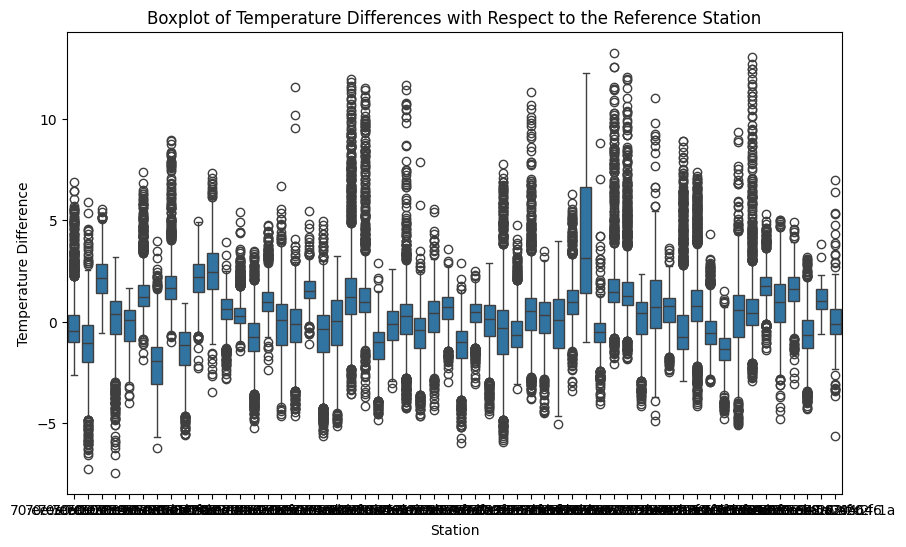

In [29]:
# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to the Reference Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [30]:
df_merged['temp'].max()

28.4

In [31]:
# Compute mean
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,70:ee:50:00:36:40,-0.144566
1,70:ee:50:00:c9:6e,-1.108802
2,70:ee:50:00:ea:00,2.147818
3,70:ee:50:01:33:6a,0.029142
4,70:ee:50:02:e6:38,-0.261849
5,70:ee:50:03:d3:54,1.404223
6,70:ee:50:03:d3:d8,-2.042367
7,70:ee:50:04:f0:c2,1.839838
8,70:ee:50:05:53:70,-1.402916
9,70:ee:50:05:ea:a6,2.109179


## Add coordinates

In [32]:
stations = pd.read_csv('netatmo_stations.csv')
stations

,device_id,module_id,lon,lat
0,70:ee:50:12:ce:a6,02:00:00:12:ba:e6,-5.821986,43.381939
1,70:ee:50:a2:20:c2,02:00:00:a2:03:0c,-5.816930,43.378882
2,70:ee:50:90:f5:64,02:00:00:90:dd:a0,-5.816846,43.378936
3,70:ee:50:71:49:30,02:00:00:71:4b:f2,-5.811817,43.377968
4,70:ee:50:90:d8:82,02:00:00:ab:de:78,-5.804601,43.379862
...,...,...,...,...
60,70:ee:50:12:4a:2c,02:00:00:12:82:52,-5.838470,43.371909
61,70:ee:50:b5:14:de,02:00:00:b5:0c:70,-5.829638,43.371635
62,70:ee:50:58:ac:20,02:00:00:58:b5:24,-6.005197,43.322529
63,70:ee:50:17:e6:4e,02:00:00:17:ef:7a,-5.975623,43.348381


In [33]:
stations = stations.drop(columns=['module_id'])
stations

,device_id,lon,lat
0,70:ee:50:12:ce:a6,-5.821986,43.381939
1,70:ee:50:a2:20:c2,-5.816930,43.378882
2,70:ee:50:90:f5:64,-5.816846,43.378936
3,70:ee:50:71:49:30,-5.811817,43.377968
4,70:ee:50:90:d8:82,-5.804601,43.379862
...,...,...,...
60,70:ee:50:12:4a:2c,-5.838470,43.371909
61,70:ee:50:b5:14:de,-5.829638,43.371635
62,70:ee:50:58:ac:20,-6.005197,43.322529
63,70:ee:50:17:e6:4e,-5.975623,43.348381


In [34]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='device_id')
data.head()

,station,temp_diff,device_id,lon,lat
0,70:ee:50:00:36:40,-0.144566,70:ee:50:00:36:40,-5.848340,43.356196
1,70:ee:50:00:c9:6e,-1.108802,70:ee:50:00:c9:6e,-5.849700,43.361700
2,70:ee:50:00:ea:00,2.147818,70:ee:50:00:ea:00,-5.866472,43.368765
3,70:ee:50:01:33:6a,0.029142,70:ee:50:01:33:6a,-5.847184,43.360374
4,70:ee:50:02:e6:38,-0.261849,70:ee:50:02:e6:38,-5.816177,43.441605


In [35]:
data = data.drop(columns=['device_id'])
data.head()

,station,temp_diff,lon,lat
0,70:ee:50:00:36:40,-0.144566,-5.848340,43.356196
1,70:ee:50:00:c9:6e,-1.108802,-5.849700,43.361700
2,70:ee:50:00:ea:00,2.147818,-5.866472,43.368765
3,70:ee:50:01:33:6a,0.029142,-5.847184,43.360374
4,70:ee:50:02:e6:38,-0.261849,-5.816177,43.441605


In [36]:
data.to_csv('diff.csv', index=False)